## Ejemplo 1: K-Medias

### 1. Objetivos:
    - Aprender a aplicar un algoritmo de K-Medias
    
---
    
### 2. Desarrollo:

Tenemos un dataset que contiene latitudes y longitudes de algunos crímenes cometidos en una región no especificada:

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('../Prototype/datos/base_cluster.csv')
del df['serie']
df.head()

,periodo,centro,centro norte,norte,sur,Hasta_20_anios,De_21_a_25_anios,De_26_a_30_anios,De_31_a_35_anios,De_36_a_40_anios,...,Mas_de_25_UMA,Vivienda_Economica,Vivienda_Media,Vivienda_Otros,Vivienda_Popular,Vivienda_Residencial,Vivienda_Residencial_Plus,Vivienda_Tradicional,Total_nacional,marca_variacion
0,201201,7212,6403,10521,3699,131,3175,5858,5327,4791,...,0,510,2277,6812,10652,609,100,6875,27835,0
1,201202,12074,9978,18343,6401,367,6625,10059,8922,8140,...,1,1353,2585,9088,24876,753,167,7974,46796,1
2,201203,15098,11867,20314,7985,437,7826,12143,10807,9311,...,0,1577,2971,10278,29723,874,209,9632,55264,1
3,201204,10971,8565,12644,5051,287,4716,7989,7061,6323,...,0,1017,2436,8085,17251,681,163,7598,37231,0
4,201205,16617,10875,17616,6179,337,6754,10675,10053,8720,...,1,1255,3412,11006,24321,948,194,10151,51287,1


Vamos a visualizar los puntos geográficos formados por cada par de latitudes y longitudes:

C:\Users\IN334839\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


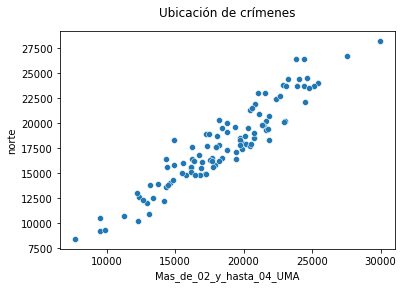

In [20]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación de crímenes', pad=15)
ax.set_xlabel('Mas_de_02_y_hasta_04_UMA')
ax.set_ylabel('norte')

sns.scatterplot(df['Mas_de_02_y_hasta_04_UMA'], df['norte'], ax=ax);

Digamos que queremos establecer algunos centros de vigilancia en esta región. Queremos que cada centro de vigilancia pueda atender efectivamente a la subregión que le toque vigilar. Para esto, tenemos que subdividir nuestra región en varias subregiones. No sabemos cómo se conforman esas subregiones, ni tampoco sabemos a qué subregión pertenecería cada una de las instancias de actividad delictiva.

Asumiendo que los patrones de actividad delictiva se mantienen más o menos constantes, podemos utilizar K-Medias para subdividir nuestra región en subregiones. Lo único que tenemos que elegir es cuántas subregiones queremos conformar. Esta decisión podría ser tomada con base en los recursos disponibles, por ejemplo. Si tuviéramos recursos para establecer 6 centros de vigilancia, entonces podemos crear 6 subregiones.

In [23]:
from sklearn.cluster import KMeans

In [24]:
k_means = KMeans(n_clusters=6, max_iter=10000)

In [25]:
df[['Mas_de_02_y_hasta_04_UMA', 'norte']]

,Mas_de_02_y_hasta_04_UMA,norte
0,9475,10521
1,14948,18343
2,18225,20314
3,12340,12644
4,18004,17616
...,...,...
101,17288,14914
102,18395,16559
103,18208,16205
104,19409,16406


In [26]:
k_means.fit(df[['Mas_de_02_y_hasta_04_UMA', 'norte']])

KMeans(max_iter=10000, n_clusters=6)

In [27]:
centers = k_means.cluster_centers_

centers

array([[13539.76923077, 13027.        ],
       [21538.2       , 20642.15      ],
       [19037.88461538, 18239.88461538],
       [24789.8       , 24614.93333333],
       [10024.16666667,  9742.5       ],
       [16456.30769231, 15899.80769231]])

C:\Users\IN334839\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\IN334839\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


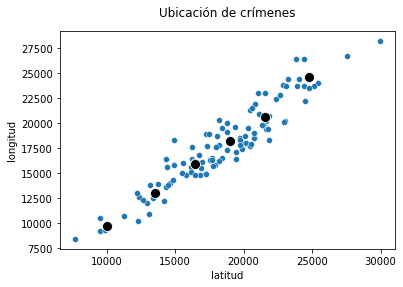

In [28]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(df['Mas_de_02_y_hasta_04_UMA'], df['norte'], ax=ax, palette='rainbow');
sns.scatterplot(centers[:,0], centers[:,1], ax=ax, s=100, color='black');

Vamos a clasificar nuestros datos para poder colorearlos y visualizar mejor las subregiones:

In [13]:
clasificaciones = k_means.predict(df[['latitud', 'longitud']])

C:\Users\IN334839\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\IN334839\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


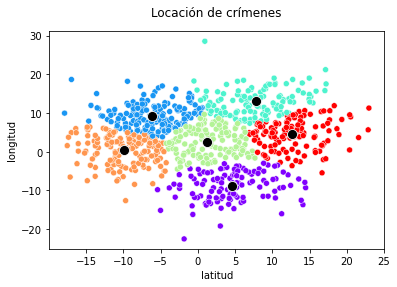

In [14]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Locación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(df['latitud'], df['longitud'], ax=ax, hue=clasificaciones, palette='rainbow');
sns.scatterplot(centers[:,0], centers[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove()

Subdiviendo nuestra región en estas 6 subregiones, tenemos cierta seguridad de que toda la actividad delictiva que sucede en la región podrá ser atendida efectivamente.

Si tuviéramos recursos para 9 centros de vigilancia, bastaría con realizar lo siguiente:

In [15]:
k_means_9 = KMeans(n_clusters=9, max_iter=10000)

In [16]:
k_means_9.fit(df[['latitud', 'longitud']])
centers_9 = k_means_9.cluster_centers_
clasificaciones_9 = k_means_9.predict(df[['latitud', 'longitud']])

C:\Users\IN334839\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\IN334839\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


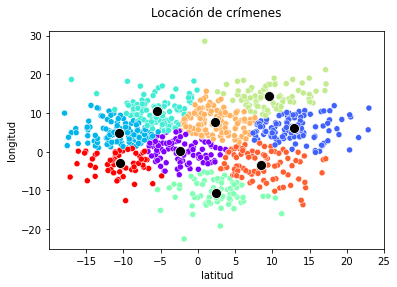

In [17]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Locación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(df['latitud'], df['longitud'], ax=ax, hue=clasificaciones_9, palette='rainbow');
sns.scatterplot(centers_9[:,0], centers_9[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove()

**¿Qué usos se te ocurren a ti para este algoritmo?**